# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Πλέγμα</td>
            <td style="background-color:#F2F4F7" rowspan="2">Πεπερασμένο</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Bαθμός $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Τυχαίος γραφος</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Τυχαίος γράφος</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td style="background-color:#FFFFFF" rowspan="3">Επίπεδος</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [1]:
seedno=600    #seed number !DO NOT CHANGE IT!

In [2]:
%matplotlib inline 
# With the above backend, the output of plotting commands is displayed inline within frontends 
# like the Jupyter notebook, directly below the code cell that produced it. The resulting 
# plots will then also be stored in the notebook document.
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

In [14]:
node_styling = {
    "node_color": "midnightblue",
    "edge_color": "blue",
    "node_size": 200
}

In [15]:
def draw_circular_graph(G: nx.Graph, node_styling: dict = node_styling):
    fig, ax = plt.subplots(figsize=(7,7))
    nx.draw_circular(G, **node_styling, ax=ax)
    ax.axis("equal")
    plt.show()

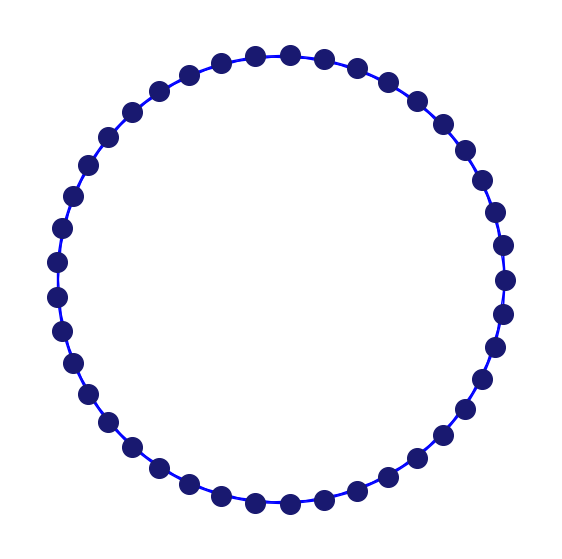

In [16]:
random.seed(seedno) # initialize the random number generator.
#n=4x μέγεθος δικτύου: αντικαταστήστε το x με το τελευταίο ψηφίο του αριθμού μητρώου σας. ΑΜ. 03400131
n=41
d=4  # degree of each node in grid
# για την κατασκευή του REG χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
# Επιλέξτε προσεκτικά την τιμή της παραμέτρου p. 
REG = nx.watts_strogatz_graph(n, d, p=0)  # probability of replacing ring nodes is zero
REG.graph['name'] = 'REG' # save the graph's name as an attribute

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(REG)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

Erdős–Rényi random graph model.

$G(n, M)$ graph is chosen uniformly at random from the collection of all graphs which have $n$ nodes and $M$ edges. The nodes are considered to be labeled, meaning that graphs obtained from each other by permuting the vertices are considered to be distinct. For example, in the $G(3,2)$ model, there are three two-edge graphs on three labeled vertices (one for each choice of the middle vertex in a two-edge path), and each of these three graphs is included with probability $\frac{1}{3}$.

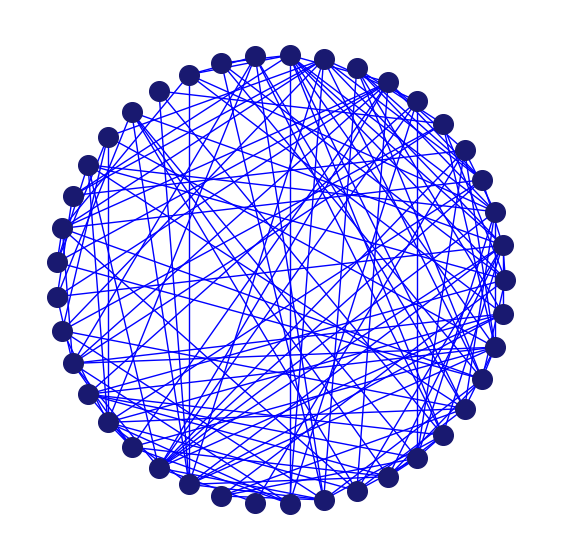

In [34]:
random.seed(seedno)
n = 41 
M = 150

# για την κατασκευή του RGER χρησιμοποιήστε την gnm_random_graph από το networkx
RGER = nx.gnm_random_graph(n, M)
RGER.graph['name'] = 'RGER' # save the graph's name as an attribute

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(RGER)

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

Proposed by Edgar Gilbert, denoted $G(n,p)$, in which every possible edge occurs independently with probability $0 < p < 1$.  The probability of obtaining any one particular random graph with m edges is $p^{m}(1-p)^{N-m}$ with the notation $N=\tbinom{n}{2}$.

In [8]:
random.seed(seedno)
n=41
R=0.35

# για την κατασκευή του RGG χρησιμοποιήστε την random_geometric_graph από το networkx
RGG = nx.random_geometric_graph(n, R)

#οπτικοποίηση: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html

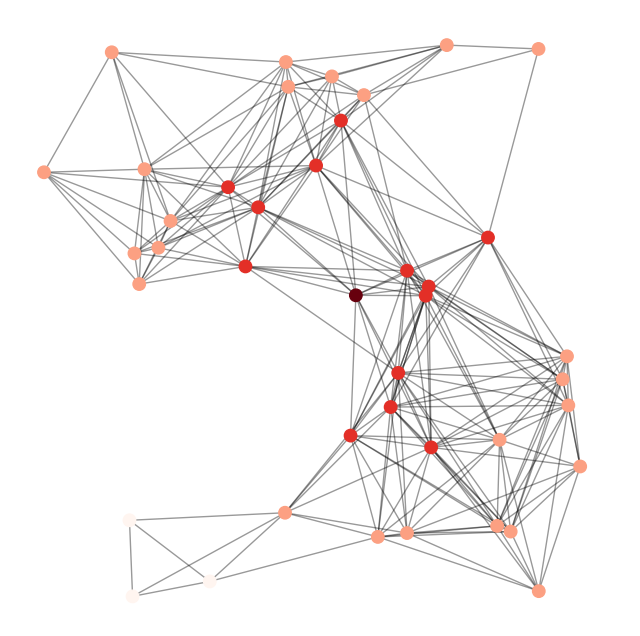

In [9]:
pos = nx.get_node_attributes(RGG, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(RGG, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(RGG, pos, alpha=0.4)
nx.draw_networkx_nodes(
    RGG,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

Returns a random graph using Barabási–Albert preferential attachment.

A graph of $n$ nodes is grown by attaching new nodes each with $d$ edges that are preferentially attached to existing nodes with high degree.

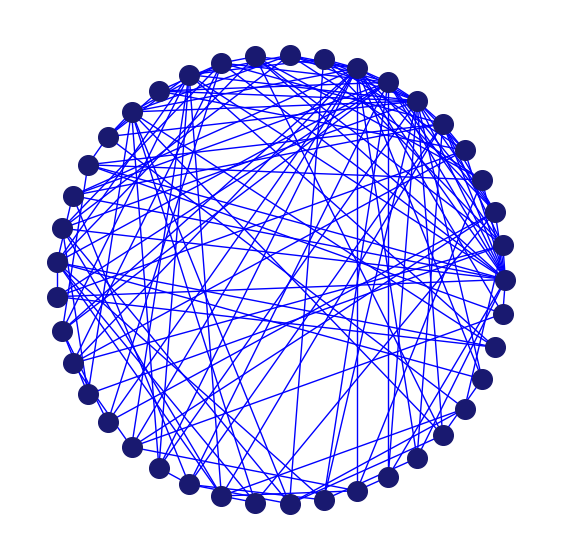

In [10]:
random.seed(seedno)
n=41
d=4

# για την κατασκευή του SF χρησιμοποιήστε την barabasi_albert_graph από το networkx
SF = nx.barabasi_albert_graph(n, d) 

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(SF)

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

First create a ring over $n$ nodes. Then each node in the ring is joined to its $d$ nearest neighbors (or $d-1$ neighbors if $d$ is odd). Then shortcuts are created by replacing some edges as follows: for each edge $(u,v)$ in the underlying "$n$-ring with $d$-nearest neighbors" with probability $p$ replace it with a new edge $(u,w)$ with uniformly random choice of existing node $w$.

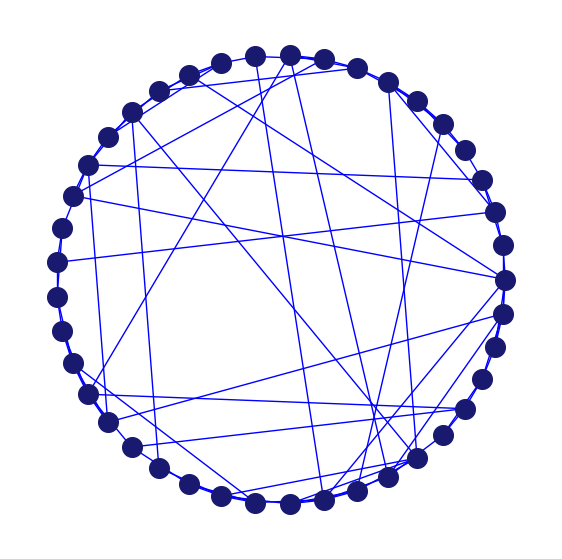

In [11]:
random.seed(seedno)
n = 41
d = 4
p = 0.25

# για την κατασκευή του SW χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
SW = nx.watts_strogatz_graph(n, d, p) 

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
draw_circular_graph(SW)

## B. Μετρικές δικτύου

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 
#### Να σχολιαστούν τα αποτελέσματα.

The clustering coefficient (cc) quantifies the grouping of a network. It essentially shows how well a node is connected to its neighorhood.

In [22]:
def cc(G: nx.Graph):
    local_cc: dict = nx.clustering(G) # calculate local clustering coefficients for all graph nodes
    n = nx.number_of_nodes(G) # nodes number
    
    # histogram of node (local) clustering coefficients
    n_bins = 20
    cc_dist: list[float] = list(local_cc.values())
    plt.hist(cc_dist, bins=n_bins)

    # mean cc and variance
    mean_cc: float = sum(cc_dist)/n
    print(mean_cc)
    

AttributeError: 'Graph' object has no attribute 'items'

0.5


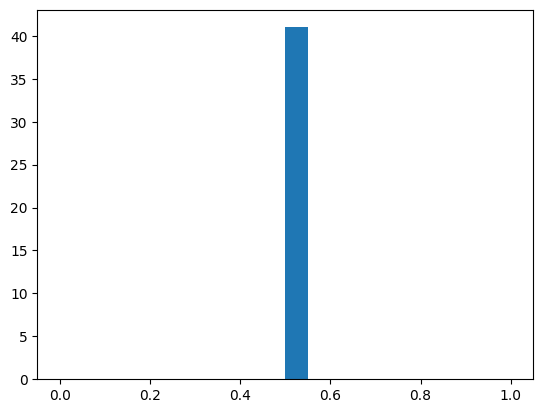

In [23]:
cc(REG)

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

In [9]:
def compute_path_lengths(G):
    pass

#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας?

In [10]:
def find_nodes(G):
    pass

In [11]:
# να προσδιοριστεί το label του κόμβου και το σύνολο των κόμβων 
# με τους οποίους συνδέεται με μήκος ελάχιστου μονοπατιού ΄ίσο με τη διάμετρο. 

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [12]:
def find_periphery(G):
    pass

In [13]:
def find_center(G):
    pass

## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [14]:
def find_degree(G):
    pass

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [15]:
def find_closeness(G):
    pass

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [16]:
def find_betweenness(G):
    pass

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $alpha$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση adjacency_spectrum του networkx. 
H $alpha$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [17]:
def find_katz(G):
    pass

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [18]:
def find_central(G):
    pass

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην 41η μεγαλύτερη συνδεδεμένη συνιστώσα (index=40) του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Standord.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [19]:
#uncomment G_web=nx.read_edgelist("web-Stanford.txt",create_using=nx.DiGraph())

In [20]:
#find the 40th largest weakly connected component of the graph web-Stanford
#G40 = 

In [21]:
#pagerank

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
    <caption>Πίνακας 2</caption>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.
#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;
#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);
#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

In [22]:
print("Connectivity REG")

Connectivity REG


In [23]:
print("Connectivity RG Erdos-Renyi")

Connectivity RG Erdos-Renyi


In [24]:
print("Connectivity RG Gilbert")

Connectivity RG Gilbert


In [25]:
print("Connectivity RGG")

Connectivity RGG


In [26]:
print("Connectivity SF")

Connectivity SF


In [27]:
print("Connectivity SW") 

Connectivity SW


### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [28]:
def find_cut(G):
    pass

### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

In [29]:
random.seed(seedno)
#n=30x
d=4

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

In [30]:
#read csv
import csv
G_got=nx.Graph() #the graph of the GOT characters
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            G_got.add_edge(row[0],row[1],weight=row[2])
            line_count += 1

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 